In [23]:
#!pip install opencv-python
#!pip install matplotlib


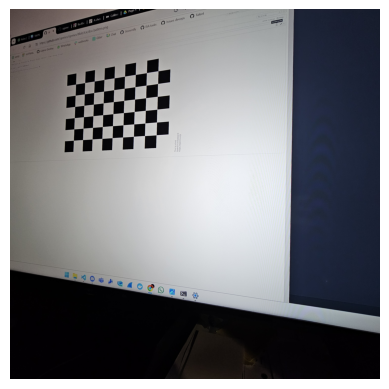

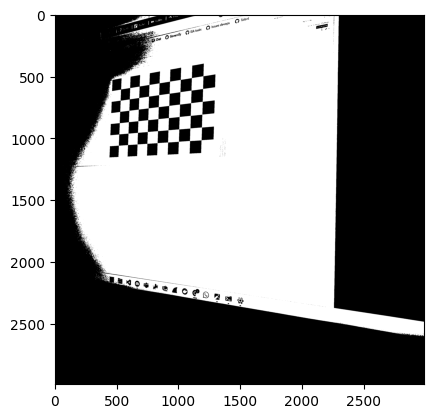

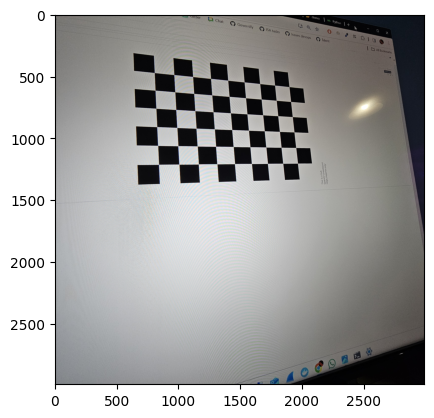

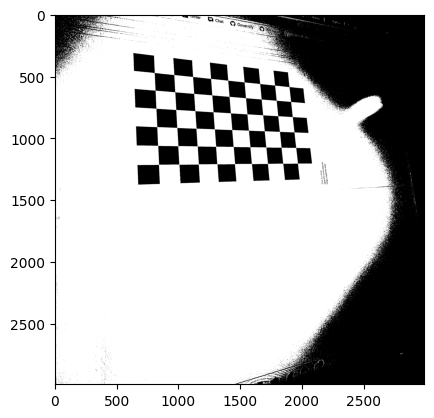

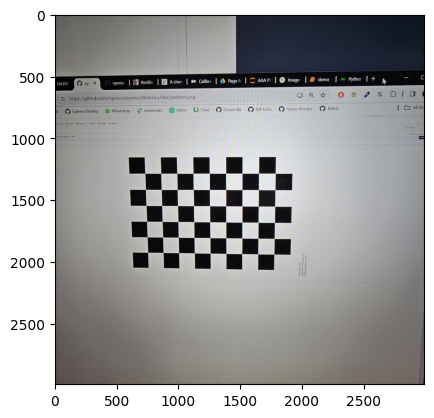

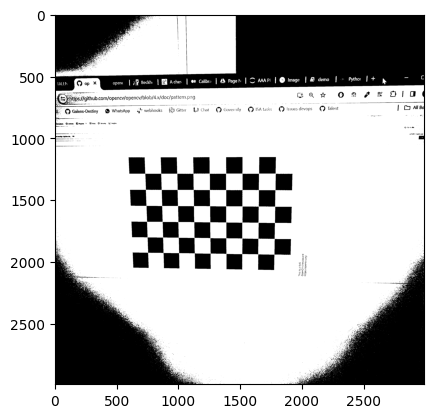

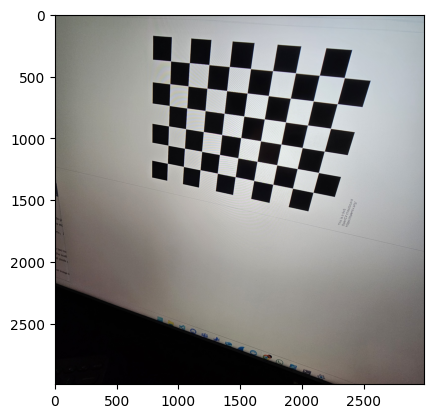

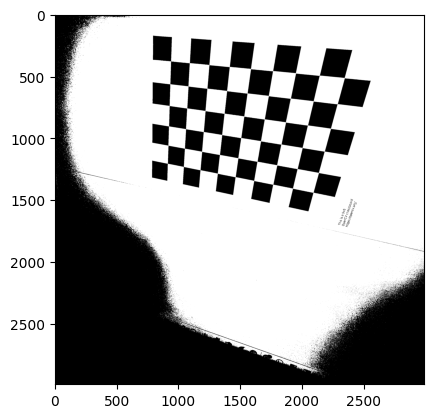

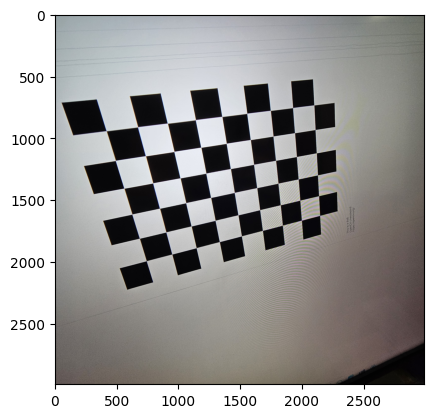

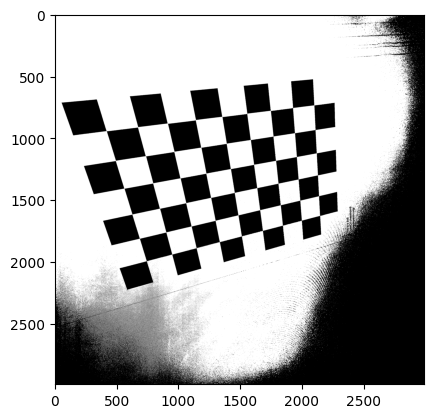

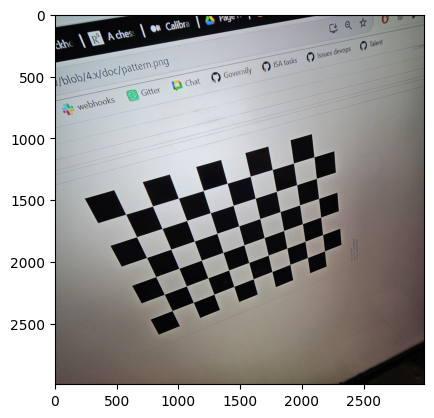

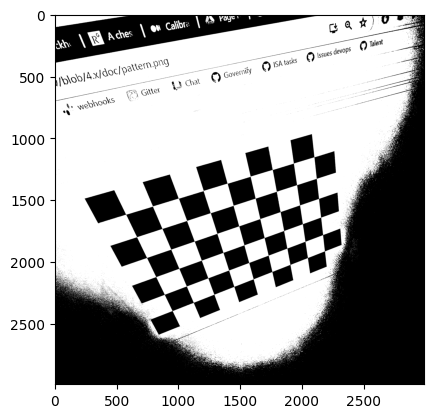

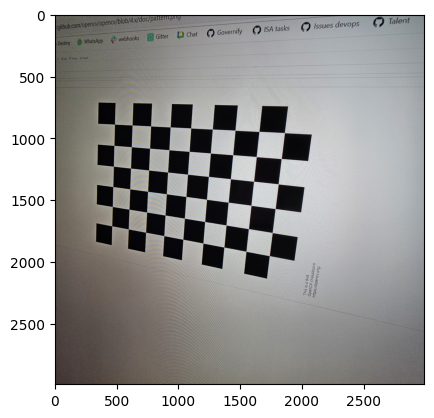

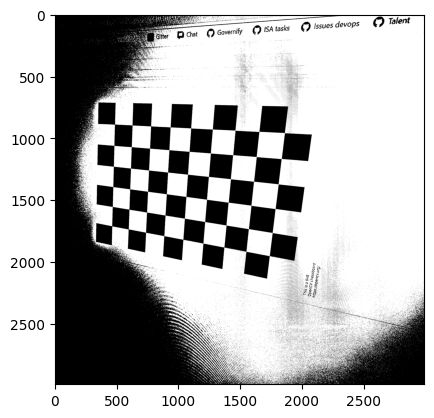

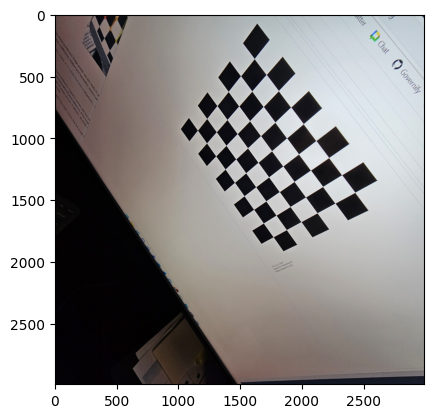

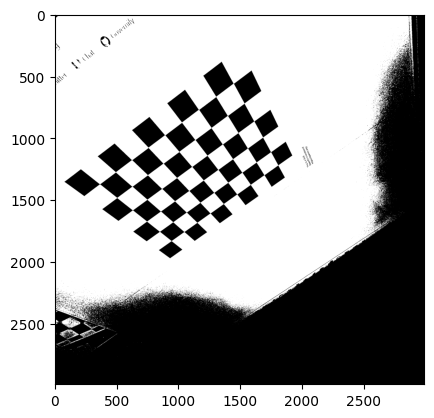

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import cv2
import glob
plt.axis('off')  
images_paths = glob.glob('angular-1to1/*_*.jpg')
for file_name in images_paths:
    color_image = plt_img.imread(file_name)
    gray_image = cv2.imread(file_name,0)
    threshold, binarized_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(color_image)
    plt.show()
    plt.imshow(binarized_image,cmap="gray")
    plt.show()
    

Loading image: angular.png
success


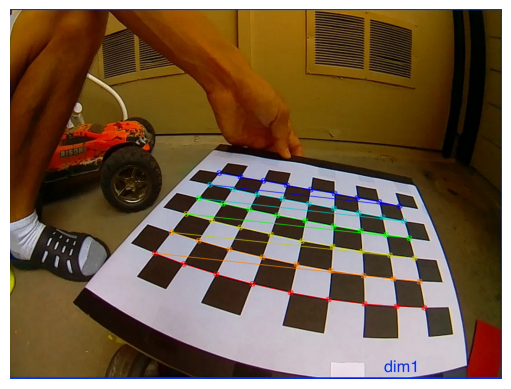

In [31]:
import numpy as np
import cv2 as cv
import glob
import matplotlib.pyplot as plt
#---------------------------------PARAMETERS
rows_count = 6
columns_count = 9
#---------------------------------
# termination criteria
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.1)
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((rows_count*columns_count,3), np.float32)
objp[:,:2] = np.mgrid[0:columns_count,0:rows_count].T.reshape(-1,2)
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
#images = glob.glob('angular-1to1/*.jpg')
images = glob.glob('angular.png')
for fname in images:
    print("Loading image: "+fname)
    img = cv.imread(fname)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (columns_count,rows_count), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        print("success")
        objpoints.append(objp)
        corners2 = cv.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        cv.drawChessboardCorners(img, (columns_count,rows_count), corners2, ret)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.axis("off")
        plt.show()
    else:
        print("chessboard not found")



### CALIBRATION

In [32]:
#CALIBRATION
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [33]:
img = cv.imread('angular.png')
h,  w = img.shape[:2]
newcameramtx, roi = cv.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

In [36]:
# undistort
dst = cv.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
cv.imwrite('calibresult.png', dst)

True

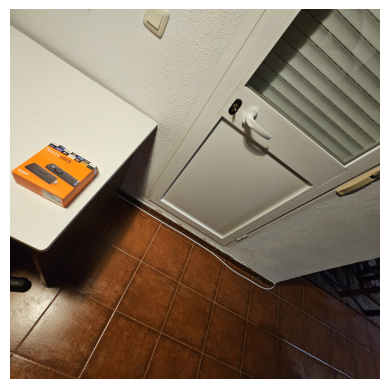

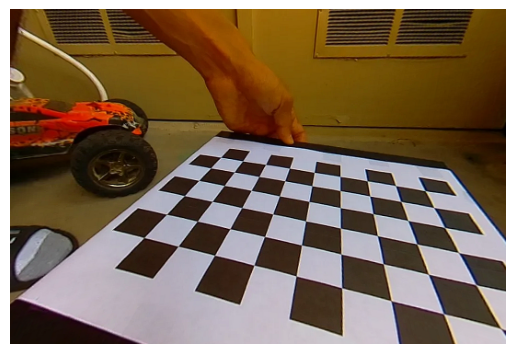

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import cv2
import glob

images_paths = ['angular-test.jpg','calibresult.png']
for file_name in images_paths:
    color_image = plt_img.imread(file_name)
    plt.axis('off')  
    plt.imshow(color_image)
    plt.show()